<a href="https://colab.research.google.com/github/jithesh9539/Dimensionality_Reduction_Technique/blob/main/PCA_SVD_TSNE_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PCA**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [4]:
from google.colab import files
uploaded=files.upload()

Saving Wine.csv to Wine.csv


In [5]:
df=pd.read_csv('Wine.csv')
df.shape

(178, 14)

In [6]:
df.describe()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
x_Variables=df.iloc[:,1:14]

In [9]:
x_Variables

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [10]:
X = StandardScaler().fit_transform(x_Variables)

In [11]:
X.shape

(178, 13)

In [12]:
cov_matrix=np.cov(X.T)

In [13]:
cov_matrix

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317],
       [ 0.29073446, -0.337060

In [14]:
eigen_values,eigen_vectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigen_values[i]),eigen_vectors[:,i]) for i in range (len(eigen_values))]
print('Eigenvalues in descending order:')
for i in eigen_pairs:
  print(i[0])

Eigenvalues in descending order:
4.732436977583593
2.5110809296451233
1.4542418678464695
0.9241658668248732
0.8580486765371116
0.6452822124678548
0.5541414662457851
0.10396199182075336
0.3504662749462543
0.16972373898012205
0.2905120326939765
0.22706428173088514
0.25232001036082513


In [15]:
pca=PCA()
pca=pca.fit(X)
explained_variance=pca.explained_variance_ratio_

In [16]:
explained_variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [17]:
  df1=pd.DataFrame({'variable':pca.explained_variance_ratio_,'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13']})

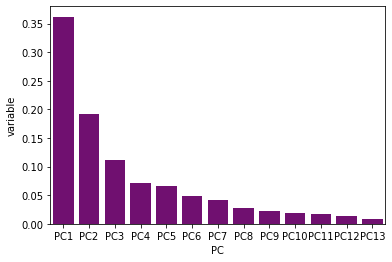

In [18]:
sns.barplot(x='PC',y="variable",data=df1,color="purple");

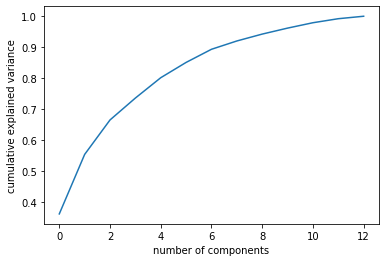

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [20]:
pca_2=PCA(n_components=2)
pca_2=pca_2.fit(X)
pca_2d=pca_2.transform(X)


In [21]:
pca_2d

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

In [22]:
PCA_dataset = pd.DataFrame(data = pca_2d, columns = ['component1', 'component2'] )
PCA_dataset.head()

,component1,component2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [24]:
principal_component1 = PCA_dataset['component1']
principal_component2 = PCA_dataset['component2']

<Figure size 432x288 with 0 Axes>

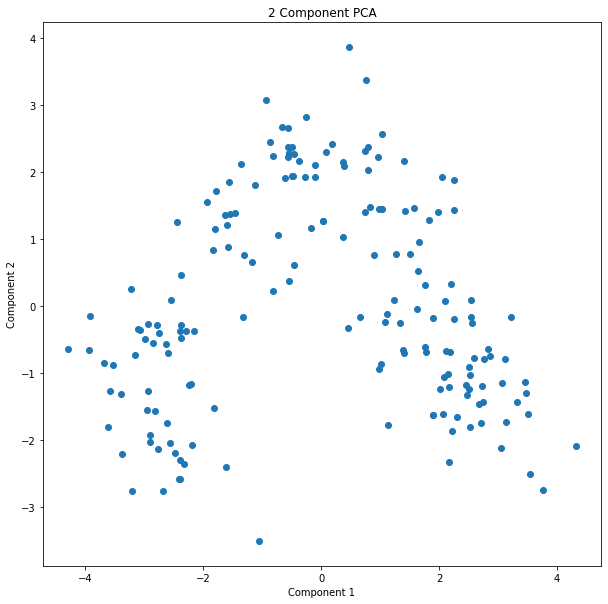

In [29]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset['component1'], PCA_dataset['component2'])

**SVD**

In [30]:
svd_df=pd.read_csv('Wine.csv')

In [31]:
svd_df.shape

(178, 14)

In [32]:
svd_df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [33]:
encoder=LabelEncoder()

In [34]:
for col in svd_df.columns:
  svd_df[col]=encoder.fit_transform(svd_df[col])

In [35]:
svd_df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,118,43,44,12,45,73,107,11,87,81,49,120,94
1,0,65,49,18,1,21,68,91,9,31,56,50,102,92
2,0,63,71,63,32,22,73,115,13,96,83,48,86,101
3,0,121,59,49,21,33,95,122,7,84,109,30,104,116
4,0,67,81,75,45,37,73,89,20,66,53,49,73,66


In [36]:
x_var=svd_df.iloc[:,1:14]
y_var=svd_df.iloc[:,0]
scaler=StandardScaler()
x_feat=scaler.fit_transform(x_var)

In [37]:
u,s,v=np.linalg.svd(x_feat,full_matrices=True)

In [38]:
u.shape

(178, 178)

In [39]:
u

array([[-0.12601885,  0.07082407, -0.01476376, ..., -0.01882032,
        -0.02963174, -0.08609586],
       [-0.07497485, -0.01912163, -0.12256267, ...,  0.11575157,
         0.04651587,  0.14082687],
       [-0.08232436,  0.04802808,  0.07829489, ...,  0.08580915,
         0.02914877, -0.05582693],
       ...,
       [ 0.08466123,  0.1248798 , -0.05661571, ...,  0.93738156,
        -0.05319095, -0.0035262 ],
       [ 0.07590444,  0.11291678, -0.03112642, ..., -0.04986983,
         0.93955418, -0.00485545],
       [ 0.09748019,  0.1324618 ,  0.06832091, ...,  0.00396895,
        -0.00252008,  0.93415922]])

In [40]:
s.shape

(13,)

In [41]:
v.shape


(13, 13)

In [42]:
var_explained=np.round(s**2/np.sum(s**2),decimals=3)
var_explained

array([0.368, 0.205, 0.103, 0.071, 0.061, 0.046, 0.039, 0.026, 0.023,
       0.02 , 0.018, 0.013, 0.007])

Text(0, 0.5, 'Percent of the variance explained')

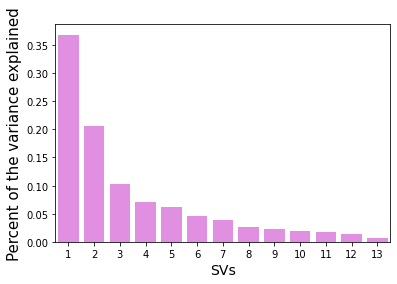

In [43]:
sns.barplot(x=list(range(1,len(var_explained)+1)),y=var_explained,color="violet")
plt.xlabel('SVs',fontsize=14)
plt.ylabel('Percent of the variance explained', fontsize=15)

**T-SNE**